In [18]:
from google.colab import files

file= files.upload()

Saving company.csv to company (3).csv


In [22]:
import pandas as pd
import numpy as np
import io

df= pd.read_csv(io.BytesIO(file['company (3).csv']))
df=df.dropna()
df


,employee_id,department,salary,years_at_company,age,job_satisfaction,performance_score,last_promotion_year,education_level,gender,hired_date
0,1,Sales,"60,000",5,30,7,85,2018,Bachelor,Male,15-06-2015
1,2,Engineering,95.000,8,35,8,90,2017,Master,F,01-Sep-2012
2,3,HR,45K,2 years,28,6,70,2020,Bachelor,Female,23-04-2019
3,4,Marketing,75K,10,40,9,95,2015,Master,M,10-Feb-2010
4,5,IT,"50,000.00",3 years,25,5,60,2011,Bachelor,Male,18-07-18
5,6,Engineering,85K,6,33,7,88,2019,Master,M,03-Oct-2016
6,7,Marketing,70,7,38,8,92,2016,Bachelor,F,14-May-2013
7,8,Sales,55,4,29,6,75,2021,Bachelor,M,22-Jun-2018
8,9,IT,48,2,26,5,62,2022,Master,F,07-Nov-2019
9,10,HR,40K,1,24,4,68,2023,Bachelor,F,30-Aug-2020


In [23]:
# nettoyer les colonnes salary et years_at_company

df['salary'] = df['salary'].replace({',': '', '\$': '', 'K': '000'}, regex=True).astype(float)

df['years_at_company'] = df['years_at_company'].replace(' years', '', regex=True)

df



,employee_id,department,salary,years_at_company,age,job_satisfaction,performance_score,last_promotion_year,education_level,gender,hired_date
0,1,Sales,60000.0,5,30,7,85,2018,Bachelor,Male,15-06-2015
1,2,Engineering,95.0,8,35,8,90,2017,Master,F,01-Sep-2012
2,3,HR,45000.0,2,28,6,70,2020,Bachelor,Female,23-04-2019
3,4,Marketing,75000.0,10,40,9,95,2015,Master,M,10-Feb-2010
4,5,IT,50000.0,3,25,5,60,2011,Bachelor,Male,18-07-18
5,6,Engineering,85000.0,6,33,7,88,2019,Master,M,03-Oct-2016
6,7,Marketing,70.0,7,38,8,92,2016,Bachelor,F,14-May-2013
7,8,Sales,55.0,4,29,6,75,2021,Bachelor,M,22-Jun-2018
8,9,IT,48.0,2,26,5,62,2022,Master,F,07-Nov-2019
9,10,HR,40000.0,1,24,4,68,2023,Bachelor,F,30-Aug-2020


In [24]:

from datetime import datetime

fomatdat = ['%d-%m-%Y', '%d-%b-%Y', '%Y-%m-%d','%d-%m-%y']

def konvetiDate(dat):
    for elem in fomatdat:
        try:
            return pd.to_datetime(dat, format=elem)
        except ValueError:
            continue
    return pd.NaT

df['hired_date']= df['hired_date'].apply(konvetiDate)
# konveti kolon gender

df['gender'] = df['gender'].replace({'Male': 'M', 'Female': 'F', 'M': 'M', 'F': 'F'})

df

,employee_id,department,salary,years_at_company,age,job_satisfaction,performance_score,last_promotion_year,education_level,gender,hired_date
0,1,Sales,60000.0,5,30,7,85,2018,Bachelor,M,2015-06-15
1,2,Engineering,95.0,8,35,8,90,2017,Master,F,2012-09-01
2,3,HR,45000.0,2,28,6,70,2020,Bachelor,F,2019-04-23
3,4,Marketing,75000.0,10,40,9,95,2015,Master,M,2010-02-10
4,5,IT,50000.0,3,25,5,60,2011,Bachelor,M,2018-07-18
5,6,Engineering,85000.0,6,33,7,88,2019,Master,M,2016-10-03
6,7,Marketing,70.0,7,38,8,92,2016,Bachelor,F,2013-05-14
7,8,Sales,55.0,4,29,6,75,2021,Bachelor,M,2018-06-22
8,9,IT,48.0,2,26,5,62,2022,Master,F,2019-11-07
9,10,HR,40000.0,1,24,4,68,2023,Bachelor,F,2020-08-30


In [25]:
# Gerer les NAN

# remplacer les NAN dans salary
df['salary'].fillna(df['salary'].mean(), inplace=True )

# supprimer les NAN dans hired_date
df.dropna(subset=['hired_date'] ,inplace=True)
print(df.isnull().sum())




employee_id            0
department             0
salary                 0
years_at_company       0
age                    0
job_satisfaction       0
performance_score      0
last_promotion_year    0
education_level        0
gender                 0
hired_date             0
dtype: int64


In [26]:
# aplike analiz estatistik

print(df.describe())


       employee_id        salary        age  job_satisfaction  \
count    44.000000     44.000000  44.000000         44.000000   
mean     23.227273  50759.090909  30.227273          6.272727   
min       1.000000     48.000000  23.000000          3.000000   
25%      11.750000  42000.000000  26.000000          5.000000   
50%      22.500000  54000.000000  29.000000          6.000000   
75%      34.500000  70000.000000  33.250000          7.000000   
max      47.000000  90000.000000  40.000000          9.000000   
std      13.768626  24782.624597   4.898332          1.484237   

       performance_score  last_promotion_year                     hired_date  
count          44.000000            44.000000                             44  
mean           76.772727          2019.068182  2017-03-12 03:49:05.454545408  
min            55.000000          2011.000000            2010-02-10 00:00:00  
25%            67.250000          2017.000000            2015-06-15 00:00:00  
50%            75.0

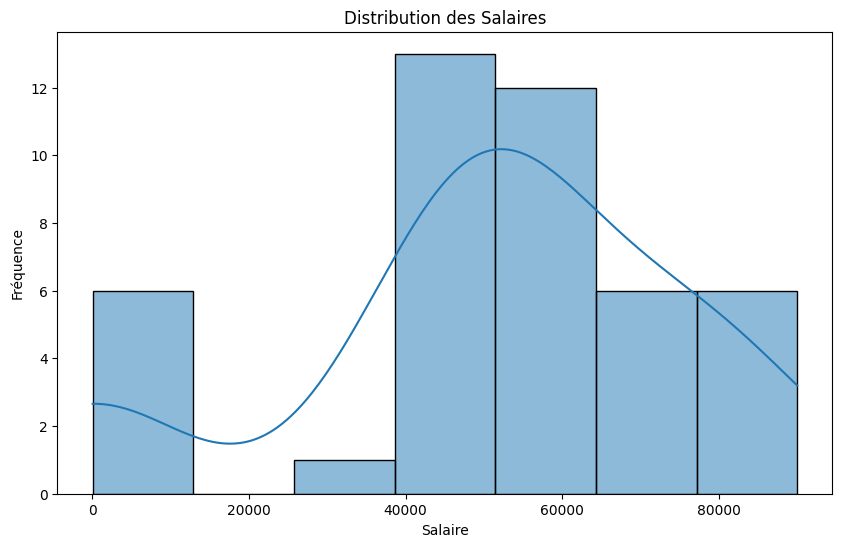

In [27]:
# Histogramme des salaires
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], kde=True)
plt.title('Distribution des Salaires')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')
plt.show()

In [28]:
# repartition de chaque employes dans chaque departement
repartition_employes_par_departement = df.groupby('department')['employee_id'].count()

print(repartition_employes_par_departement)


department
Engineering     9
HR              9
IT             10
Marketing       8
Sales           8
Name: employee_id, dtype: int64


In [29]:
# repatisyon pa seks nan chak depatman
repartition_sexe_departement = pd.crosstab(df['department'], df['gender'])

print(repartition_sexe_departement)


gender       F  M
department       
Engineering  3  6
HR           8  1
IT           4  6
Marketing    4  4
Sales        2  6


department
Engineering    32.777778
HR             25.444444
IT             26.200000
Marketing      38.125000
Sales          29.875000
Name: age, dtype: float64


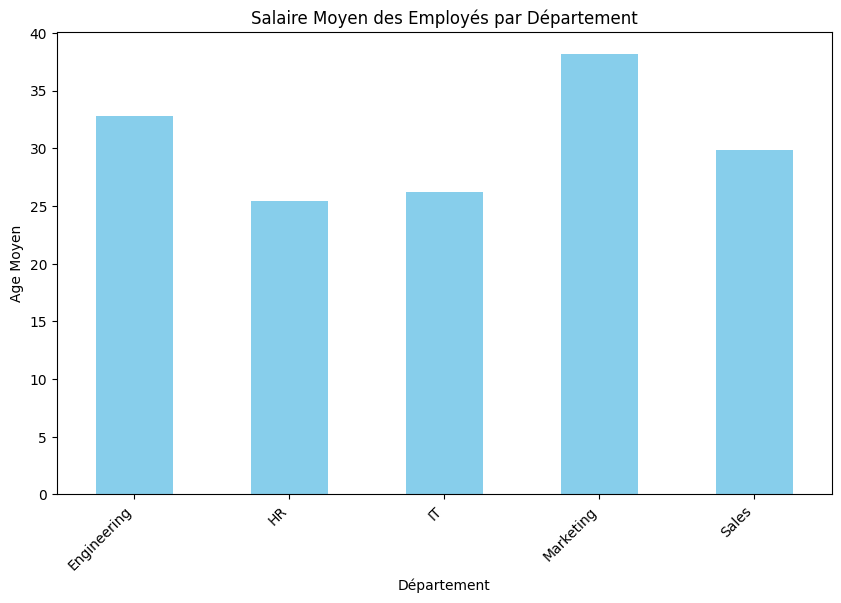

In [30]:
# Mwayèn laj anplwaye yo pou chak depatman.

age_moyen_par_departement = df.groupby('department')['age'].mean()
print(age_moyen_par_departement)

plt.figure(figsize=(10, 6))
age_moyen_par_departement.plot(kind='bar', color='skyblue')
plt.title('Salaire Moyen des Employés par Département')
plt.xlabel('Département')
plt.ylabel('Age Moyen')
plt.xticks(rotation=45, ha='right')
plt.show()

department
Engineering    39241.666667
HR             56444.444444
IT             42710.000000
Marketing      59758.750000
Sales          58381.875000
Name: salary, dtype: float64


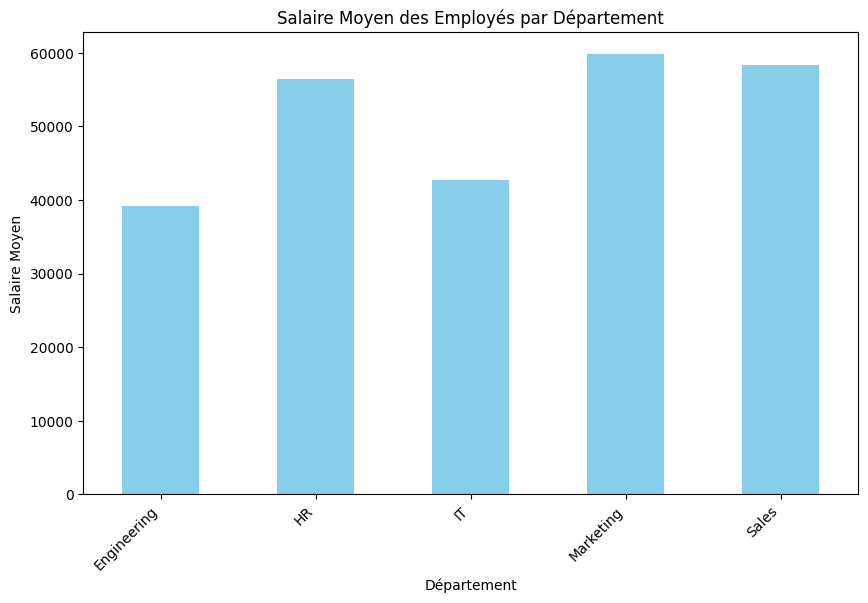

In [31]:
#Mwayèn salè nan chak depatman
salaire_moyen_par_departement = df.groupby('department')['salary'].mean()

print(salaire_moyen_par_departement)

# un diagramme a barre pour la visualisation

plt.figure(figsize=(10, 6))
salaire_moyen_par_departement.plot(kind='bar', color='skyblue')
plt.title('Salaire Moyen des Employés par Département')
plt.xlabel('Département')
plt.ylabel('Salaire Moyen')
plt.xticks(rotation=45, ha='right')
plt.show()

In [32]:
# Satisfaksyon travay sou chak depatman

satisfaction_travail= df.groupby('department')['job_satisfaction'].mean()

print(satisfaction_travail)

department
Engineering    7.222222
HR             4.777778
IT             5.100000
Marketing      8.250000
Sales          6.375000
Name: job_satisfaction, dtype: float64


In [33]:
# Ki mwayèn tan ki genyen depi dènye fwa konpayi a te bay yon pwomosyon nan chak depatman?

annee_actuelle=2024

df['derniere_promotion'] = annee_actuelle - df['last_promotion_year']
temps_moyen= df.groupby('department')['derniere_promotion'].mean().astype(int)

print(temps_moyen)

department
Engineering    5
HR             2
IT             4
Marketing      7
Sales          4
Name: derniere_promotion, dtype: int64


In [34]:
#Bay mwayèn salè ki ekziste an fonksyon de nivo edikasyon anplwaye yo (Bachelor, Master)
salaire_moy_par_edu = df.groupby('education_level')['salary'].mean()



print(salaire_moy_par_edu)

education_level
Bachelor    53632.375
Master      47311.150
Name: salary, dtype: float64
